In [24]:
import pandas as pd
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt; reload(plt)
import random

import analytic; reload(analytic)
import nsfg; reload(nsfg)
import utils; reload(utils)

<module 'utils' from '/home/taot/github/playground/thinkstats/utils.py'>

In [49]:
preg = nsfg.ReadFemPreg(prefix='data/')
live = preg[preg.outcome == 1]
firsts = live[live.pregordr == 1]
others = live[live.pregordr != 1]

In [9]:
df = analytic.ReadBabyBoom()

In [12]:
diffs = df.minutes.diff()
diffs

0       NaN
1      59.0
2      14.0
3      37.0
4      62.0
5      68.0
6       2.0
7      15.0
8       9.0
9     157.0
10     27.0
11     37.0
12      2.0
13     55.0
14     86.0
15     14.0
16      4.0
17     40.0
18     36.0
19     47.0
20      9.0
21     61.0
22      1.0
23     26.0
24     13.0
25     28.0
26     77.0
27     26.0
28     45.0
29     25.0
30     18.0
31     29.0
32     15.0
33     38.0
34      2.0
35      2.0
36     19.0
37     27.0
38     14.0
39     13.0
40     19.0
41     54.0
42     70.0
43     28.0
Name: minutes, dtype: float64

In [15]:
cdf = utils.Cdf(diffs)

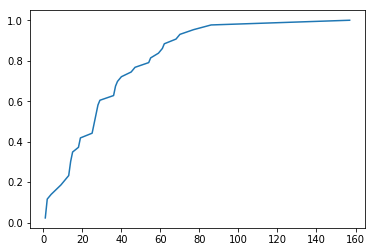

In [16]:
cdf.show()

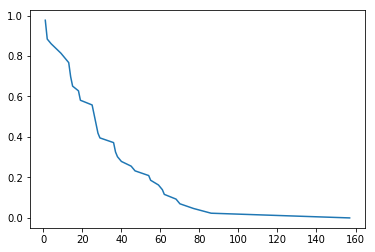

In [34]:
plt.plot(cdf.xs, 1 - cdf.ps)
plt.show()

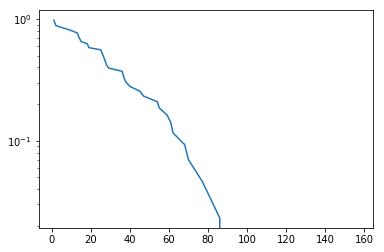

In [33]:
plt.plot(cdf.xs, 1 - cdf.ps)
plt.yscale('log')
plt.show()

   ## 5.2 The normal distribution

In [35]:
import scipy.stats

In [41]:
scipy.stats.norm.cdf(6)

0.9999999990134123

In [43]:
xs = [x / 100.0 for x in range(-600, 600)]

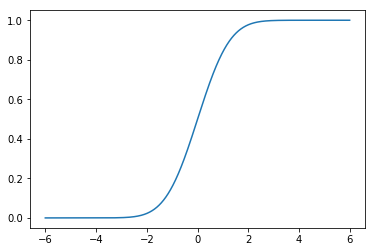

In [46]:
plt.plot(xs, scipy.stats.norm.cdf(xs))
plt.show()

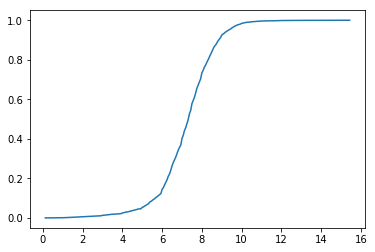

In [50]:
cdf = utils.Cdf(live.totalwgt_lb)
cdf.show()

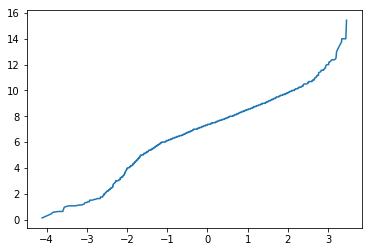

In [105]:
filtered = [x for x in live.totalwgt_lb if not np.isnan(x)]
sample_size = len(filtered)
xs = sorted(np.random.normal(size=sample_size))
ys = sorted(filtered)
plt.plot(xs, ys)
plt.show()

## 5.4 The lognormal distribution

In [106]:
import brfss

In [107]:
df = brfss.ReadBrfss()

In [110]:
df[:10]

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0


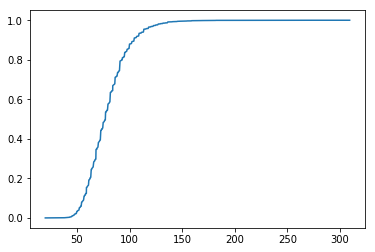

In [113]:
cdf = utils.Cdf(df.wtkg2)
cdf.show()

In [ ]:
cdf2 = utils.Cdf(np.log(df.wtkg2))

## The Pareto distribution

In [26]:
import populations; reload(populations)
import utils; reload(utils)

<module 'utils' from '/home/taot/github/playground/thinkstats/utils.py'>

In [27]:
df = populations.ReadData()

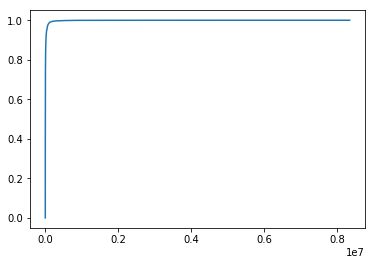

In [30]:
cdf = utils.Cdf(df)
cdf.show()

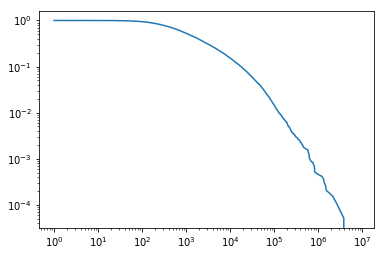

In [36]:
ccdf = utils.Cdf(cdf)
ccdf.ps = 1 - ccdf.ps
plt.plot(ccdf.xs, ccdf.ps)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [76]:
x_m = 0.5
alpha = 1
def cdf_pareto(x):
    return 1 - np.exp(-alpha * (np.log(x) - np.log(x_m)))

In [57]:
def cdf_pareto2(x):
    return 1 - np.power((x / x_m), -alpha)

In [77]:
a = [x / 10 + x_m for x in range(100)]
a = np.asarray(a)

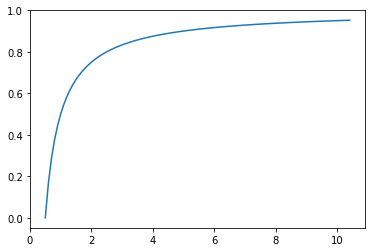

In [78]:
pareto_a = cdf_pareto(a)
plt.plot(a, pareto_a)
plt.show()